# CO2 PPM - Trends in Atmospheric Carbon Dioxide
#### Members: Manuel E. Mendez Jr., Kiyoharu Sarmiento, Rijel S. Tayag


#### Dataset URL = https://datahub.io/core/co2-ppm?fbclid=IwZXh0bgNhZW0CMTEAAR3M_1xY5QFmS8QgeqfnxP3rYNL4BKyOjRoduVYio98z-1xYSdvv9VAlxYA_aem_ClL6cpumh_1hEZh8l9tYrg

### Import Libraries

In [1]:
import pandas as pd #For data manipulation
import matplotlib.pyplot as plt #For plotting graphs
import seaborn as sns #Enhanced data visualization
from sklearn.model_selection import train_test_split #Split data into training and testing sets.
from sklearn.linear_model import LinearRegression #Modeling.
from sklearn.tree import DecisionTreeRegressor #Modeling.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor #Modeling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #Model Evaluation

### Load and assign the dataset

In [2]:
# Define the path to the CO2 dataset file
CO2_PPM = './dataset/CO2.csv'

# Load the CO2 dataset into a DataFrame using pandas
df = pd.read_csv(CO2_PPM)

### Display the first few rows of the dataset

In [3]:
print(df.head())

      Date  Decimal Date  Average  Interpolated  Trend  Number of Days  \
0  1958-03     1958.2027   315.71        314.44     -1           -9.99   
1  1958-04     1958.2877   317.45        315.16     -1           -9.99   
2  1958-05     1958.3699   317.51        314.69     -1           -9.99   
3  1958-06     1958.4548   317.27        315.15     -1           -9.99   
4  1958-07     1958.5370   315.87        315.20     -1           -9.99   

  __parsed_extra  
0        [-0.99]  
1        [-0.99]  
2        [-0.99]  
3        [-0.99]  
4        [-0.99]  


### Data preprocessing

In [4]:
#Drop rows with missing values from the DataFrame 'df'
df = df.dropna()

# Convert 'Date' to datetime and extract year, month, day
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [13]:
#Create a variable 'year' to hold the 'Year' column from the DataFrame 'df'
year = df['Year']

#Define a function 'year_group' that categorizes years into groups for better visualization since the data set is large.
def year_group(year):
    if 1958 <= year <= 1969:
        return '1958-1969'
    elif 1970 <= year <= 1979:
        return '70s'
    elif 1980 <= year <= 1989:
        return '80s'
    elif 1990 <= year <= 1999:
        return '90s'
    elif 2000 <= year <= 2009:
        return '2000s'
    elif 2010 <= year <= 2019:
        return '2010s'
    else:
        return '2020s'

### Data visualization

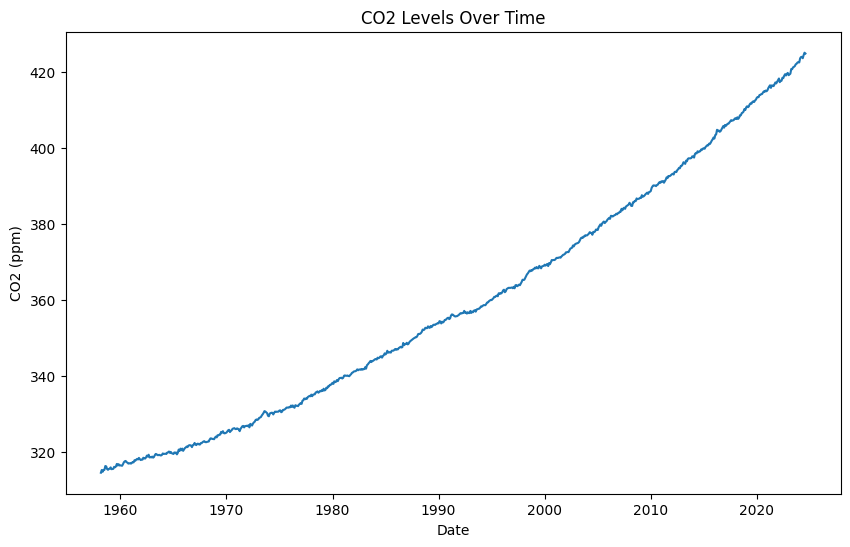

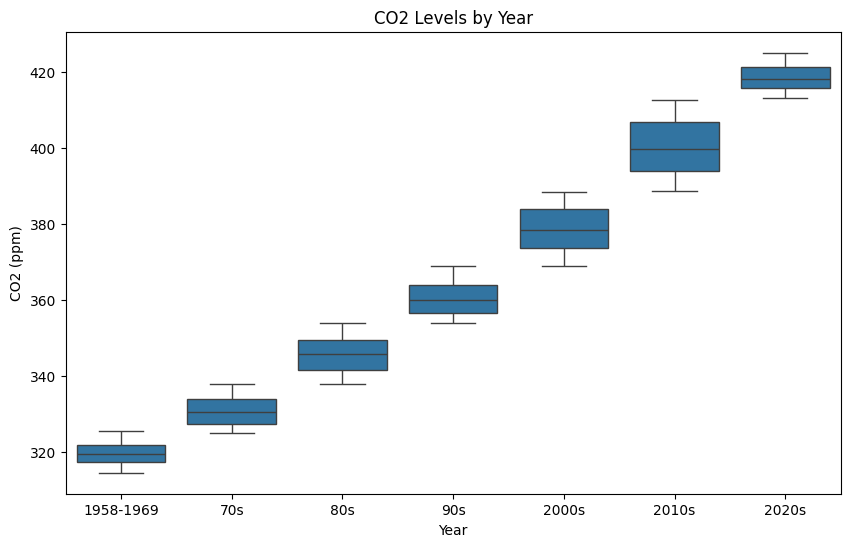

In [14]:
# Line plot of CO2 levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Interpolated', data=df) # Use seaborn to create a line plot with 'Date' on the x-axis and 'Interpolated' on the y-axis
plt.title('CO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.show()

# Box plot of CO2 levels by year
plt.figure(figsize=(10, 6))
sns.boxplot(x=year.apply(year_group), y='Interpolated', data=df) # Apply 'year_group' to categorize years and plot 'Interpolated' CO2 levels
plt.title('CO2 Levels by Year')
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.show()

### Model development

In [10]:
# Use 'Year' and 'Month' as features and 'Interpolated' as the target variable
X = df[['Year', 'Month']]
y = df['Interpolated']

# Split the dataset into training and testing sets, with 20% of the data used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model using the training data
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Train a Decision Tree Regression model using the training data
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# Train a Random Forest Regression model using the training data
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

# Train a Gradient Boosting Regression model using the training data
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

### Model evaluation

In [11]:
```python
# Define a function to evaluate a model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2)
def evaluate_model(model, X_test, y_test):
    # Predict the target values using the model
    y_pred = model.predict(X_test)
    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    # Calculate R-squared (R2)
    r2 = r2_score(y_test, y_pred)
    # Return the evaluation metrics
    return mae, mse, r2

# List of models to evaluate
models = [model_lr, model_dt, model_rf, model_gb]
# List of model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']

# Loop through each model and its name
for model, name in zip(models, model_names):
    # Evaluate the model and get the metrics
    mae, mse, r2 = evaluate_model(model, X_test, y_test)
    # Print the model name and its evaluation metrics
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")
```

Linear Regression - MAE: 3.8016224171087822, MSE: 20.618912532179273, R2: 0.9807801108026832
Decision Tree - MAE: 0.2520000000000021, MSE: 0.10713000000000213, R2: 0.9999001389269926
Random Forest - MAE: 0.23105562500005128, MSE: 0.08664885581253576, R2: 0.9999192303956287
Gradient Boosting - MAE: 0.2446623666565287, MSE: 0.1011929502406693, R2: 0.9999056731392532
